<a href="https://colab.research.google.com/github/luifer991/machine_learning_and_projects/blob/main/sms_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# import libraries
try:
  
  !pip install tf-nightly
except Exception:
  pass

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.3/596.3 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.9/440.9 KB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 KB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 72.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalle

In [13]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 84.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.0.0
    Uninstalling google-auth-oauthlib-1.0.0:
      Successfully uninstalled google-auth-oauthlib-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following

In [14]:
#!pip uninstall numpyy
#!pip uninstall protobuf
#!pip uninstall tensorboard-data-server

In [15]:
#!pip install numpy --upgrade

In [16]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

This code defines a simple natural language processing pipeline that takes in some example text data, tokenizes it, and trains a model for binary sentiment classification. Here's what it does step by step:

Import the required TensorFlow libraries and classes.
Define some example text data as a list of strings.
Set the maximum vocabulary size and sequence length, which are used for tokenization and padding.
Create a Tokenizer object and fit it on the text data to generate a vocabulary index.
Convert the text data to sequences using the texts_to_sequences method of the tokenizer.
Pad the sequences to a fixed length using the pad_sequences method.
Define a simple model using the Sequential API, which consists of an embedding layer, a flatten layer, and a dense layer with sigmoid activation.
Compile the model with binary cross-entropy loss and the Adam optimizer.
Fit the model on the padded sequences and the corresponding labels for binary sentiment classification.
This is just a simple example, but natural language processing with TensorFlow can involve many more complex techniques and models depending on the specific application.

In [26]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2023-03-29 23:01:06--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.02s   

2023-03-29 23:01:06 (14.8 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2023-03-29 23:01:06--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==========

In [31]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [32]:
df_train = pd.read_table(train_file_path, header=0, names=['indicates', 'text'], usecols=['indicates', 'text'])
df_test = pd.read_table(test_file_path, header=0, names=['indicates', 'text'], usecols=['indicates', 'text'])

df_train['indicates'] = df_train['indicates'].replace("ham", 0)
df_train['indicates'] = df_train['indicates'].replace("spam", 1)
df_test['indicates'] = df_test['indicates'].replace("ham", 0)
df_test['indicates'] = df_test['indicates'].replace("spam", 1)

train_data = tf.data.Dataset.from_tensor_slices((df_train['text'].values, df_train['indicates'].values))
test_data = tf.data.Dataset.from_tensor_slices((df_test['text'].values, df_test['indicates'].values))

In [33]:
tokenizer = tfds.deprecated.text.Tokenizer()

# To create vocabulary list from all data
vocabulary_set = set()

for text_tensor, _ in train_data.concatenate(test_data):
  some_tokens = tokenizer.tokenize(text_tensor.numpy())
  vocabulary_set.update(some_tokens)

vocab_size = len(vocabulary_set)
vocab_size

8740

In [34]:
encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set)

In [35]:
def encode(text_tensor, label):
  encoded_text = encoder.encode(text_tensor.numpy())
  return encoded_text, label

In [36]:
def encode_map_fn(text, label):
  encoded_text, label = tf.py_function(encode, inp=[text, label], Tout=(tf.int64, tf.int64))

  encoded_text.set_shape([None])
  label.set_shape([])

  return encoded_text, label

In [37]:
train_data_encoded = train_data.map(encode_map_fn)
test_data_encoded = test_data.map(encode_map_fn)

In [38]:
BUFFER_SIZE = 1000
BATCH_SIZE = 32
train_dataset = (train_data_encoded.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE))
test_dataset = (test_data_encoded.padded_batch(BATCH_SIZE))

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=test_dataset, validation_steps=30)

Epoch 1/10
131/131 [==============================] - 26s 146ms/step - loss: 0.2554 - accuracy: 0.9033 - val_loss: 0.0598 - val_accuracy: 0.9781
Epoch 2/10
131/131 [==============================] - 10s 69ms/step - loss: 0.0351 - accuracy: 0.9911 - val_loss: 0.0579 - val_accuracy: 0.9812
Epoch 3/10
131/131 [==============================] - 7s 46ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0385 - val_accuracy: 0.9906
Epoch 4/10
131/131 [==============================] - 6s 44ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0426 - val_accuracy: 0.9906
Epoch 5/10
131/131 [==============================] - 6s 42ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.0454 - val_accuracy: 0.9906
Epoch 6/10
131/131 [==============================] - 6s 38ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0537 - val_accuracy: 0.9906
Epoch 7/10
131/131 [==============================] - 5s 32ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0524 - val_accuracy: 0.9

In [40]:
BUFFER_SIZE = 1000
BATCH_SIZE = 32
train_dataset = (train_data_encoded.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE))
test_dataset = (test_data_encoded.padded_batch(BATCH_SIZE))
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, validation_data=test_dataset, steps_per_epoch=30, validation_steps=30)

Epoch 1/10
30/30 [==============================] - 13s 199ms/step - loss: 0.5162 - accuracy: 0.8750 - val_loss: 0.4002 - val_accuracy: 0.8604
Epoch 2/10
30/30 [==============================] - 4s 129ms/step - loss: 0.3690 - accuracy: 0.8635 - val_loss: 0.3406 - val_accuracy: 0.8604
Epoch 3/10
30/30 [==============================] - 3s 103ms/step - loss: 0.2568 - accuracy: 0.8729 - val_loss: 0.1660 - val_accuracy: 0.8667
Epoch 4/10
30/30 [==============================] - 2s 79ms/step - loss: 0.1203 - accuracy: 0.9458 - val_loss: 0.0831 - val_accuracy: 0.9719
Epoch 5/10
11/30 [==========>...................] - ETA: 0s - loss: 0.0630 - accuracy: 0.9882

30/30 [==============================] - 2s 64ms/step - loss: 0.0630 - accuracy: 0.9882 - val_loss: 0.0736 - val_accuracy: 0.9802


In [41]:
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    validation_steps=30,
    epochs=10,
)

Epoch 1/10
131/131 [==============================] - 9s 63ms/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0739 - val_accuracy: 0.9792
Epoch 2/10
131/131 [==============================] - 8s 57ms/step - loss: 0.0137 - accuracy: 0.9964 - val_loss: 0.0525 - val_accuracy: 0.9865
Epoch 3/10
131/131 [==============================] - 5s 33ms/step - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.0530 - val_accuracy: 0.9875
Epoch 4/10
131/131 [==============================] - 6s 39ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0771 - val_accuracy: 0.9823
Epoch 5/10
131/131 [==============================] - 5s 31ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0603 - val_accuracy: 0.9844
Epoch 6/10
131/131 [==============================] - 5s 35ms/step - loss: 5.9324e-04 - accuracy: 0.9998 - val_loss: 0.0605 - val_accuracy: 0.9854
Epoch 7/10
131/131 [==============================] - 6s 36ms/step - loss: 1.0146e-04 - accuracy: 1.0000 - val_loss: 0.0631 - val_accuracy

In [42]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

44/44 [==============================] - 1s 33ms/step - loss: 0.0705 - accuracy: 0.9871
Test Loss: 0.07050585746765137
Test Accuracy: 0.9870596528053284


In [43]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  pred_text = encoder.encode(pred_text)
  pred_text = tf.cast(pred_text, tf.float32)
  prediction = model.predict(tf.expand_dims(pred_text, 0)).tolist()
  if prediction[0][0] < 0.5:
    prediction.append('ham')
  else:
    prediction.append('spam')
  return (prediction)

In [44]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

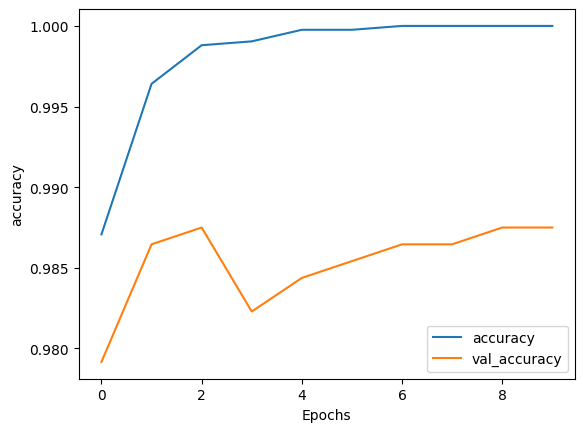

In [45]:
plot_graphs(history, 'accuracy')

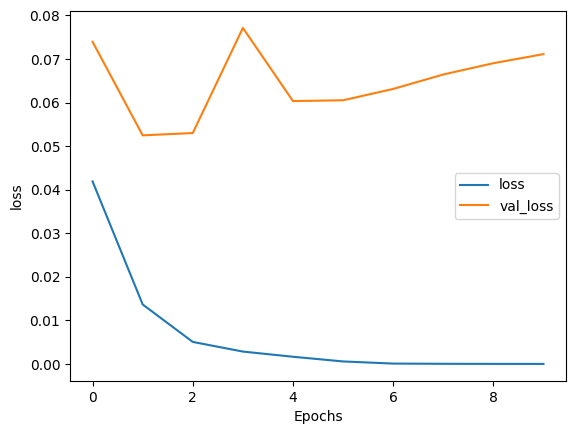

In [46]:
plot_graphs(history, 'loss')

In [47]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 [==============================] - 0s 22ms/step
You passed the challenge. Great job!


In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, GlobalMaxPooling1D, Embedding

# cargar los datos de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

# preprocesar los datos
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=0, padding='post', maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=0, padding='post', maxlen=256)

# definir el modelo
model = keras.Sequential([
    Embedding(10000, 16),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

# compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# entrenar el modelo
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

# evaluar el modelo
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/10
782/782 [==============================] - 41s 51ms/step - loss: 0.6022 - accuracy: 0.7533 - val_loss: 0.4805 - val_accuracy: 0.8070
Epoch 2/10
782/782 [==============================] - 17s 21ms/step - loss: 0.4113 - accuracy: 0.8326 - val_loss: 0.3876 - val_accuracy: 0.8323
Epoch 3/10
782/782 [==============================] - 10s 12ms/step - loss: 0.3363 - accuracy: 0.8632 - val_loss: 0.3573 - val_accuracy: 0.8447
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2936 - accuracy: 0.8820 - val_loss: 0.3453 - val_accuracy: 0.8493
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2620 - accuracy: 0.8964 - val_loss: 0.3393 - val_accuracy: 0.8514
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2362 - accuracy: 0.9080 - val_loss: 0.3382 - val_accuracy: 0.8524
Epoch 7/10
782/782 [==============================] - 8s 11ms/step - loss: 0.2139 - accuracy: 0.9197 - val_loss: 0.3396 - val_accuracy: 0.85

In [49]:
# obtener las predicciones del modelo para las primeras 10 muestras de los datos de prueba
predictions = model.predict(test_data[:10])

# imprimir las predicciones y las etiquetas verdaderas
print('Predicciones: ', predictions)
print('Etiquetas verdaderas: ', test_labels[:10])


1/1 [==============================] - 0s 56ms/step
Predicciones:  [[0.04904948]
 [0.99587184]
 [0.50556654]
 [0.5332459 ]
 [0.96745914]
 [0.9566698 ]
 [0.94167125]
 [0.03493392]
 [0.97375757]
 [0.9895649 ]]
Etiquetas verdaderas:  [0 1 1 0 1 1 1 0 0 1]


In [50]:
# evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


782/782 - 1s - loss: 0.3535 - accuracy: 0.8502 - 1s/epoch - 2ms/step

Test accuracy: 0.8502399921417236


In [51]:
import numpy as np

# crear una muestra de entrada
new_data = np.array([[2, 4, 6, 8, 10, 0, 0, 0]]) # una muestra de 8 palabras, con padding a 0

# hacer la predicción del modelo
prediction = model.predict(new_data)

# imprimir la predicción
print('Predicción:', prediction)


1/1 [==============================] - 0s 69ms/step
Predicción: [[0.43241474]]


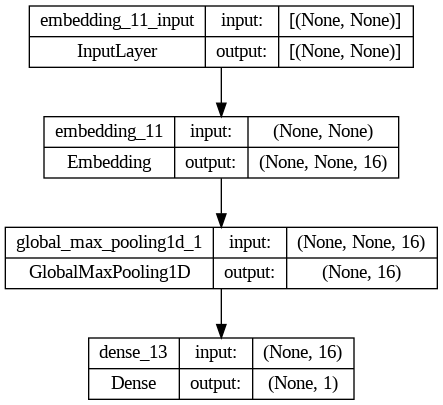

In [52]:
from tensorflow.keras.utils import plot_model

# visualizar el modelo
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


Epoch 1/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1482 - accuracy: 0.9511 - val_loss: 0.3615 - val_accuracy: 0.8474
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1356 - accuracy: 0.9560 - val_loss: 0.3691 - val_accuracy: 0.8462
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1243 - accuracy: 0.9605 - val_loss: 0.3782 - val_accuracy: 0.8444
Epoch 4/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1140 - accuracy: 0.9649 - val_loss: 0.3887 - val_accuracy: 0.8426
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 0.1049 - accuracy: 0.9682 - val_loss: 0.4003 - val_accuracy: 0.8388
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0964 - accuracy: 0.9715 - val_loss: 0.4099 - val_accuracy: 0.8379
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 0.0886 - accuracy: 0.9744 - val_loss: 0.4216 - val_accuracy: 0.8365
Epoch 

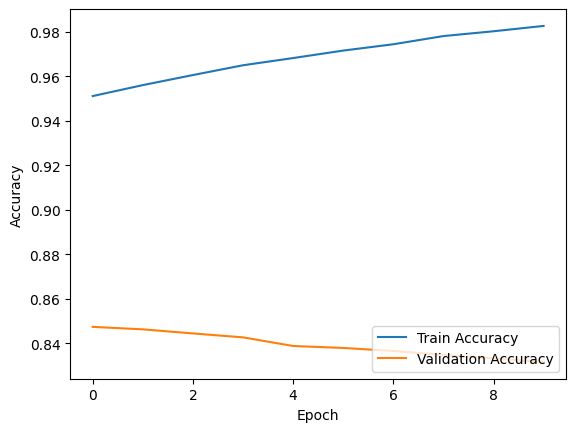

In [53]:
import matplotlib.pyplot as plt

# Entrenar el modelo
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

# Graficar el rendimiento del modelo
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
